Importing the Dependencies.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from the keras.datsets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


X_train:
  images: 60000,
  image dimension: 28*28,
  grayscale

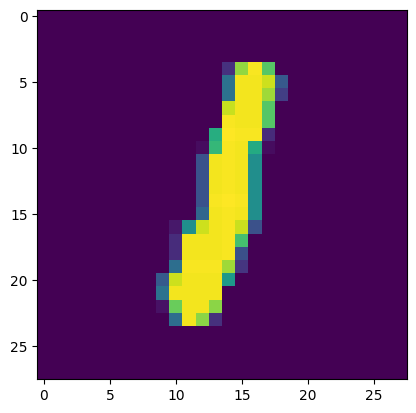

1


In [ ]:
# dispaly a image
plt.imshow(X_train[4507])
plt.show()

# corresponding label
print(Y_train[4507])

In [ ]:
# scaling the values.

X_train  = X_train/255
X_test = X_test/255

Building the Neural Network

In [ ]:
# setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2917 - accuracy: 0.9162
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1358 - accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1023 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0824 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

Training data accuracy = 98.86%

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9731


In [ ]:
print(accuracy)

0.9731000065803528


Test data accuracy = 97.31%

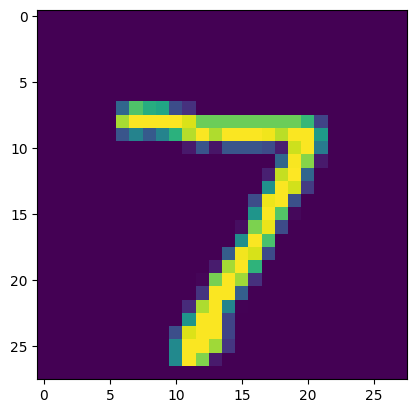

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred[0])

[6.7168334e-03 3.1460633e-03 5.9623003e-02 9.1827399e-01 3.2863852e-06
 1.3643037e-01 2.6262295e-08 9.9999720e-01 2.6697525e-01 2.2407021e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
label_for_first_imamge = np.argmax(Y_pred[0])
print(label_for_first_imamge)

7


In [ ]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 968    1    2    0    2    1    2    1    3    0]
 [   0 1122    4    1    0    1    2    0    5    0]
 [   5    3 1003    0    4    0    3    5    9    0]
 [   1    0    5  968    1   15    0    4    8    8]
 [   1    1    4    1  963    1    3    1    0    7]
 [   4    0    0    7    1  868    3    1    6    2]
 [   4    3    1    1    3    6  936    0    4    0]
 [   1    3   13    3    2    0    0 1000    1    5]
 [   9    1    2    5    4    7    3    3  936    4]
 [   1    2    0    6   16    7    1    6    9  961]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

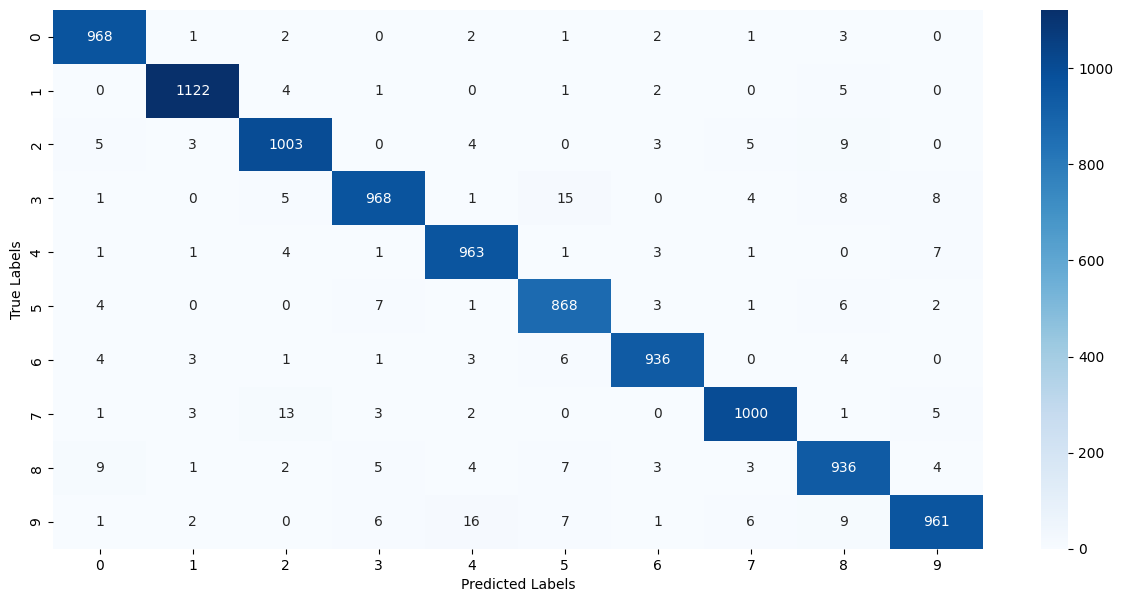

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Predictive System

In [ ]:
# input_image_path = input('Path of the image to be predicted: ')

# input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)

# grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# input_image_resize = cv2.resize(grayscale, (28, 28))

# input_image_resize = input_image_resize/255

# image_reshaped = np.reshape(input_image_resize, [1,28,28])

# input_prediction = model.predict(image_reshaped)

# input_pred_label = np.argmax(input_prediction)

# print('The Handwritten Digit is recognised as ', input_pred_label)